In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def get_categroy(age):
    cat = ""
    if age <= -1: cat = "Unknown"
    elif age <= 5: cat = "Baby"
    elif age <= 12: cat = "Child"
    elif age <= 18: cat = "Teenager"
    elif age <= 25: cat = "Student"
    elif age <= 35: cat = "Young Adult"
    elif age <= 60: cat = "Adult"
    else : cat = "Elderly"
    return cat

def feature_tf(df):
    enc_feature = ["Sex", "AgeGroup"]
    drop_feature = ["Name", "Embarked", "Ticket", "Cabin", "Age"]
    df["AgeGroup"] = df["Age"].apply(lambda x : get_categroy(x))
    df.drop(columns = drop_feature, inplace=True)
    for feature in enc_feature:
        enc = LabelEncoder()
        df[feature] = enc.fit_transform(df[feature])
    return df

def show_metrics(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred) 
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion)
    print("Acc : {}".format(accuracy))
    print("precision : {}".format(precision))
    print("recall : {}".format(recall))

df = pd.read_csv("res/titanic/train.csv")
X = df.iloc[:, df.columns != "Survived"]
y = df.iloc[:, df.columns == "Survived"]
feature_tf(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
show_metrics(y_test, y_pred)

[[92 13]
 [22 52]]
Acc : 0.8044692737430168
precision : 0.8
recall : 0.7027027027027027


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### get probability of predictions using Estimator.predict_proba(X)
- concatenate the result of prediction

In [41]:
y_pred = lr.predict(X_test)
prob = lr.predict_proba(X_test)
res = np.concatenate([prob, y_pred.reshape(-1, 1)], axis=1)
res

array([[0.27873982, 0.72126018, 1.        ],
       [0.9066548 , 0.0933452 , 0.        ],
       [0.50401226, 0.49598774, 0.        ],
       [0.02970212, 0.97029788, 1.        ],
       [0.89957613, 0.10042387, 0.        ],
       [0.89376527, 0.10623473, 0.        ],
       [0.82769747, 0.17230253, 0.        ],
       [0.28672046, 0.71327954, 1.        ],
       [0.32930771, 0.67069229, 1.        ],
       [0.95199723, 0.04800277, 0.        ],
       [0.41349029, 0.58650971, 1.        ],
       [0.14176893, 0.85823107, 1.        ],
       [0.7617059 , 0.2382941 , 0.        ],
       [0.44211217, 0.55788783, 1.        ],
       [0.63855377, 0.36144623, 0.        ],
       [0.81739132, 0.18260868, 0.        ],
       [0.83141969, 0.16858031, 0.        ],
       [0.72203234, 0.27796766, 0.        ],
       [0.07441541, 0.92558459, 1.        ],
       [0.81924418, 0.18075582, 0.        ],
       [0.89437282, 0.10562718, 0.        ],
       [0.50081163, 0.49918837, 0.        ],
       [0.

### variance in precisions and recall rate according to classifier threshold

In [57]:
prob_positive_pred = lr.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, prob_positive_pred)

print("th val : {}".format(thresholds[:4]))
print("precision val : {}".format(precisions[:4]))
print("recalls val : {}".format(recalls[:4]))

th val : [0.04800277 0.05294335 0.06559024 0.07313647]
precision val : [0.4180791  0.41477273 0.41714286 0.41954023]
recalls val : [1.         0.98648649 0.98648649 0.98648649]


### visualization of precisions and recall rate with thresholds

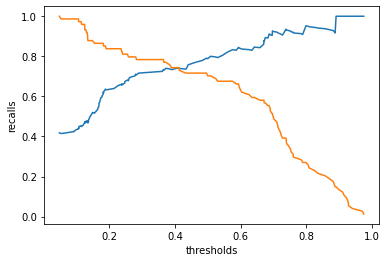

In [63]:
df = {"thresholds":thresholds, "precisions":precisions[:-1], "recalls":recalls[:-1]}
df = pd.DataFrame.from_dict(df)
sns.lineplot(x="thresholds", y="precisions", data=df)
sns.lineplot(x="thresholds", y="recalls", data=df)

###  ROC Curve visualization

fpr val : [0.         0.         0.         0.00952381]
tpr val : [0.         0.01351351 0.14864865 0.14864865]
thresholds val : [1.97455712 0.97455712 0.89026942 0.88732043]


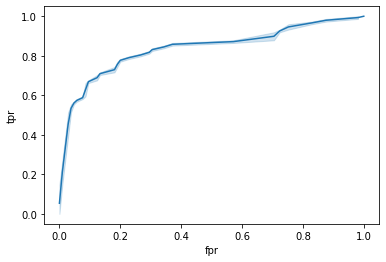

In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,prob_positive_pred)

print("fpr val : {}".format(fpr[:4]))
print("tpr val : {}".format(tpr[:4]))
print("thresholds val : {}".format(thresholds[:4]))

df = {"threshold":thresholds, "fpr":fpr, "tpr":tpr}
df = pd.DataFrame.from_dict(df)
sns.lineplot(x="fpr", y="tpr", data=df)

### roc_auc_score

In [68]:
from sklearn.metrics import roc_auc_score
roc_score = roc_auc_score(y_test, prob_positive_pred)
print(roc_score)

0.8369369369369369
